In [725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [726]:
df = pd.read_csv('dataframe/champions.csv')
df.head()

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [727]:
# Crea una nueva columna para almacenar la fase en la que se quedó el equipo 1
df['Posicion'] = ''

# Itera sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Obtiene la temporada y el equipo local de esta fila
    temporada = row['Temporada']
    equipo_local = row['Local']
    
    # Filtra el DataFrame para encontrar todas las filas de la misma temporada donde el equipo local aparezca
    partidos_equipo_local = df[(df['Temporada'] == temporada) & ((df['Local'] == equipo_local) | (df['Visitante'] == equipo_local))]
    
    # Encuentra la última fila donde el equipo local haya participado en esta temporada
    ultima_fila_equipo_local = partidos_equipo_local.index.max()
    
    # Si no hay partidos registrados para el equipo local en esta temporada, continúa con la siguiente fila
    if pd.isnull(ultima_fila_equipo_local):
        continue
    
    # Obtiene la ronda de la última aparición del equipo local en esta temporada
    ronda_ultima_aparicion = df.loc[ultima_fila_equipo_local, 'Ronda']
    
    # Si la ronda es 'Final', determinar si el equipo local ganó
    if ronda_ultima_aparicion == 'Final':
        # Verificamos si el equipo local es el ganador
        if equipo_local == df.loc[ultima_fila_equipo_local, 'Local'] and df.loc[ultima_fila_equipo_local, 'VictoriaLocal'] == 1:
            df.at[index, 'Posicion'] = 'Winner'
        elif equipo_local == df.loc[ultima_fila_equipo_local, 'Visitante'] and df.loc[ultima_fila_equipo_local, 'VictoriaVisitante'] == 1:
            df.at[index, 'Posicion'] = 'Final'
        else:
            df.at[index, 'Posicion'] = 'Final'
    else:
        # Asigna la ronda al partido actual en la nueva columna Posicion
        df.at[index, 'Posicion'] = ronda_ultima_aparicion



df.head()



,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,Group stage
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,Round of 16
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,Group stage
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,Quarter-finals
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,Group stage


In [728]:
# Primero, seleccionamos las filas correspondientes a la temporada 2011-01-01 donde el local es el equipo 11
filas_actualizar = df[(df['Temporada'] == '2011-01-01') & (df['Local'] == 11)]
# Luego, actualizamos la columna 'Posición' en estas filas con el valor 'Winner'
df.loc[filas_actualizar.index, 'Posicion'] = 'Winner'

# Seleccionamos las filas correspondientes a la temporada 2015-01-01 donde el local es el equipo 1
filas_actualizar_2015 = df[(df['Temporada'] == '2015-01-01') & (df['Local'] == 1)]
# Actualizamos la columna 'Posición' en estas filas con el valor 'Winner'
df.loc[filas_actualizar_2015.index, 'Posicion'] = 'Winner'

# Seleccionamos las filas correspondientes a la temporada 2007-01-01 donde el local es el equipo 8
filas_actualizar_2007 = df[(df['Temporada'] == '2007-01-01') & (df['Local'] == 8)]
# Actualizamos la columna 'Posición' en estas filas con el valor 'Winner'
df.loc[filas_actualizar_2007.index, 'Posicion'] = 'Winner'

# Seleccionamos las filas correspondientes a la temporada 2004-01-01 donde el local es el equipo 4
filas_actualizar_2004 = df[(df['Temporada'] == '2004-01-01') & (df['Local'] == 4)]
# Actualizamos la columna 'Posición' en estas filas con el valor 'Winner'
df.loc[filas_actualizar_2004.index, 'Posicion'] = 'Winner'

filas_actualizar_2004


,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
2254,2375,2004-01-01,Group stage,4,27,Anfield,2,0,1,0,...,57.14,75.00,0.00,25.00,0.57,0.75,1.43,508.355750,25.417787,Final
2276,2397,2004-01-01,Group stage,4,61,Anfield,0,0,0,1,...,0.00,0.00,33.33,66.67,0.00,0.00,0.00,407.353721,19.397796,Final
2332,2453,2004-01-01,Group stage,4,85,Anfield,3,1,1,0,...,60.00,100.00,0.00,0.00,0.60,1.00,0.80,396.334285,20.859699,Final
2342,2463,2004-01-01,Round of 16,4,37,Anfield,3,1,1,0,...,42.86,75.00,0.00,25.00,0.43,0.75,2.00,510.009492,24.286166,Final
2356,2477,2004-01-01,Quarter-finals,4,9,Anfield,2,1,1,0,...,66.67,80.00,20.00,0.00,0.67,0.80,0.89,637.608076,28.982185,Final
2366,2487,2004-01-01,Semi-finals,4,11,Anfield,1,0,1,0,...,54.55,66.67,33.33,0.00,0.55,0.67,1.91,740.538632,32.197332,Final


In [729]:
# Convertir la columna 'Temporada' a tipo datetime si no está en ese formato
df['Temporada'] = pd.to_datetime(df['Temporada'])

# Ordenar los datos por temporada y equipo local en orden descendente
df_sorted = df.sort_values(by=['Temporada', 'Local', 'idPartido'], ascending=[True, True, False])

# Definir una función para aplicar en el grupo para obtener el registro con el mayor índice
def get_last_game(group):
    return group.iloc[0]

# Agrupar primero por temporada y luego dentro de cada temporada por equipo local
# y aplicar la función definida para obtener el registro con el mayor índice
df = df_sorted.groupby(['Temporada', 'Local']).apply(get_last_game).reset_index(drop=True)

# Mostrar el DataFrame resultante
df

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,2605,2003-01-01,Quarter-finals,1,27,Estadio Santiago Bernabéu,4,2,1,0,...,50.00,71.43,14.29,14.29,0.50,0.71,2.08,779.908354,38.995418,Quarter-finals
1,2603,2003-01-01,Quarter-finals,2,61,Stadio Giuseppe Meazza,4,1,1,0,...,54.55,83.33,0.00,16.67,0.55,0.83,1.64,728.772530,33.126024,Quarter-finals
2,2586,2003-01-01,Round of 16,3,1,Olympiastadion,1,1,0,1,...,66.67,80.00,20.00,0.00,0.67,0.80,1.89,592.503846,31.184413,Round of 16
3,2565,2003-01-01,Group stage,6,2,Amsterdam ArenA,0,1,0,0,...,44.44,60.00,0.00,40.00,0.44,0.60,1.22,625.542732,26.064281,Group stage
4,2559,2003-01-01,Group stage,7,31,Stadio Giuseppe Meazza,1,5,0,0,...,44.44,60.00,0.00,40.00,0.44,0.60,1.22,577.060522,32.058918,Group stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,213,2022-01-01,Group stage,153,14,Parken,1,1,0,1,...,42.86,50.00,50.00,0.00,0.43,0.50,1.43,516.189990,19.853461,Group stage
636,186,2022-01-01,Group stage,184,11,Red Bull Arena,1,2,0,0,...,44.44,60.00,20.00,20.00,0.44,0.60,1.11,685.188968,26.353422,Group stage
637,192,2022-01-01,Group stage,235,2,Stadion Maksimir,0,4,0,0,...,36.36,66.67,0.00,33.33,0.36,0.67,1.00,749.233912,32.575387,Group stage
638,216,2022-01-01,Group stage,298,10,Sammy Ofer Stadium,1,6,0,0,...,55.56,60.00,20.00,20.00,0.56,0.60,2.22,675.689479,28.153728,Group stage


In [730]:
filas_lazio = df[df['Local'] == 99]

# Imprimir las filas filtradas
filas_lazio


,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
28,2564,2003-01-01,Group stage,99,94,Stadio Olimpico,1,1,0,1,...,40.00,33.33,0.0,66.67,0.40,0.33,0.80,389.726508,21.651473,Group stage
156,2063,2007-01-01,Group stage,99,85,Stadio Olimpico,1,2,0,0,...,28.57,25.00,75.0,0.00,0.29,0.25,1.29,516.228111,22.444700,Group stage
567,471,2020-01-01,Round of 16,99,3,Stadio Olimpico,1,4,0,0,...,77.78,80.00,0.0,20.00,0.78,0.80,2.56,714.096016,27.465231,Round of 16


In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   idPartido             640 non-null    int64         
 1   Temporada             640 non-null    datetime64[ns]
 2   Ronda                 640 non-null    object        
 3   Local                 640 non-null    int64         
 4   Visitante             640 non-null    int64         
 5   Evento                640 non-null    object        
 6   GolesLocal            640 non-null    int64         
 7   GolesVisitante        640 non-null    int64         
 8   VictoriaLocal         640 non-null    int64         
 9   Empate                640 non-null    int64         
 10  VictoriaVisitante     640 non-null    int64         
 11  %_Victorias_Local     640 non-null    float64       
 12  %_Empate              640 non-null    float64       
 13  %_Victoria_Visitante

### Multiclass classifier 1X2

In [732]:
df = df.drop(['Temporada', 'Ronda', 'Evento'], axis=1)
df.head()

,idPartido,Local,Visitante,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,2605,1,27,4,2,1,0,0,100.00,0.00,...,50.00,71.43,14.29,14.29,0.50,0.71,2.08,779.908354,38.995418,Quarter-finals
1,2603,2,61,4,1,1,0,0,100.00,0.00,...,54.55,83.33,0.00,16.67,0.55,0.83,1.64,728.772530,33.126024,Quarter-finals
2,2586,3,1,1,1,0,1,0,54.55,9.09,...,66.67,80.00,20.00,0.00,0.67,0.80,1.89,592.503846,31.184413,Round of 16
3,2565,6,2,0,1,0,0,1,20.00,60.00,...,44.44,60.00,0.00,40.00,0.44,0.60,1.22,625.542732,26.064281,Group stage
4,2559,7,31,1,5,0,0,1,0.00,0.00,...,44.44,60.00,0.00,40.00,0.44,0.60,1.22,577.060522,32.058918,Group stage


### Visualización de mi variable objetivo

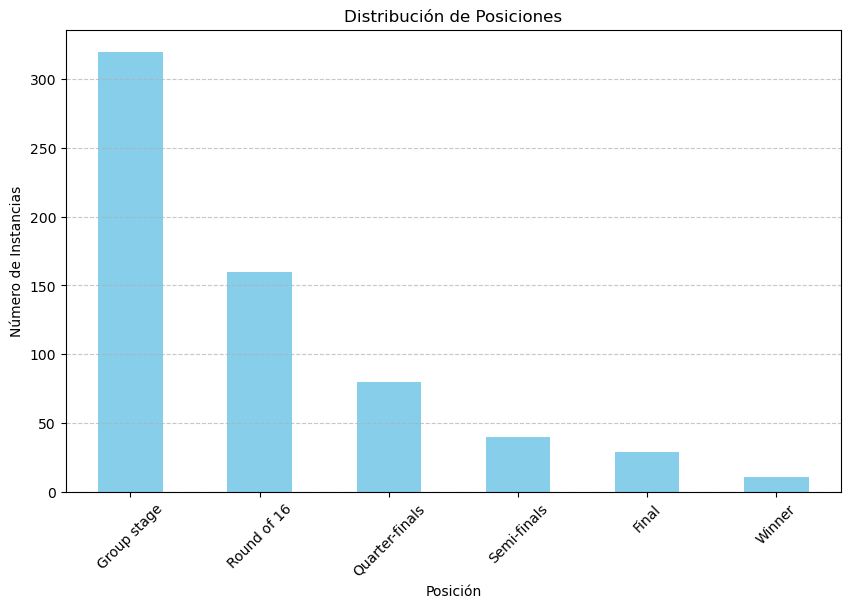

Conteo de instancias para cada posición:
Posicion
Group stage       320
Round of 16       160
Quarter-finals     80
Semi-finals        40
Final              29
Winner             11
Name: count, dtype: int64


In [733]:
# Contar el número de instancias para cada posición
conteo_posiciones = df['Posicion'].value_counts()

# Visualizar la distribución de las clases en un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_posiciones.plot(kind='bar', color='skyblue')
plt.title('Distribución de Posiciones')
plt.xlabel('Posición')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Imprimir el conteo de instancias para cada posición
print("Conteo de instancias para cada posición:")
print(conteo_posiciones)

### Modelos

In [734]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

partido_features = df.drop(['Posicion', 'GolesLocal', 'GolesVisitante', 'VictoriaLocal', 'VictoriaVisitante', 'Empate'], axis=1).columns
objetivo = 'Posicion'

# Separate features and labels
partidos_X = df[partido_features].values
partidos_y = df[objetivo].values


# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(partidos_X, partidos_y,
                                                    test_size=0.30,
                                                    random_state=0,
                                                    stratify=partidos_y)

print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 448, Test Set: 192 



### Regresión logística

In [735]:
from sklearn.linear_model import LogisticRegression

def run_model(x_train, x_test, y_train, y_test):
    lr_basico = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    lr_basico.fit(x_train, y_train)
    return lr_basico

multi_model = run_model(x_train, x_test, y_train, y_test)

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [736]:
from sklearn. metrics import classification_report

# Realizar predicciones en el conjunto de prueba
predictions = multi_model.predict(x_test)

# Imprimir las etiquetas predichas y las etiquetas reales para las primeras 15 muestras del conjunto de prueba
print('Etiquetas predichas:', predictions[:15])
print('Etiquetas reales:   ', y_test[:15])

Etiquetas predichas: ['Group stage' 'Final' 'Semi-finals' 'Quarter-finals' 'Group stage'
 'Group stage' 'Group stage' 'Final' 'Group stage' 'Group stage'
 'Group stage' 'Group stage' 'Round of 16' 'Quarter-finals' 'Group stage']
Etiquetas reales:    ['Group stage' 'Winner' 'Semi-finals' 'Quarter-finals' 'Group stage'
 'Group stage' 'Group stage' 'Final' 'Group stage' 'Group stage'
 'Group stage' 'Group stage' 'Round of 16' 'Quarter-finals' 'Group stage']


In [737]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))


Overall Accuracy: 0.9635416666666666
Overall Precision: 0.8300552104899931
Overall Recall: 0.8194444444444443


                precision    recall  f1-score   support

         Final       0.67      0.67      0.67         9
   Group stage       1.00      1.00      1.00        96
Quarter-finals       0.96      0.92      0.94        24
   Round of 16       1.00      1.00      1.00        48
   Semi-finals       0.86      1.00      0.92        12
        Winner       0.50      0.33      0.40         3

      accuracy                           0.96       192
     macro avg       0.83      0.82      0.82       192
  weighted avg       0.96      0.96      0.96       192

[[ 6  0  1  0  1  1]
 [ 0 96  0  0  0  0]
 [ 1  0 22  0  1  0]
 [ 0  0  0 48  0  0]
 [ 0  0  0  0 12  0]
 [ 2  0  0  0  0  1]]


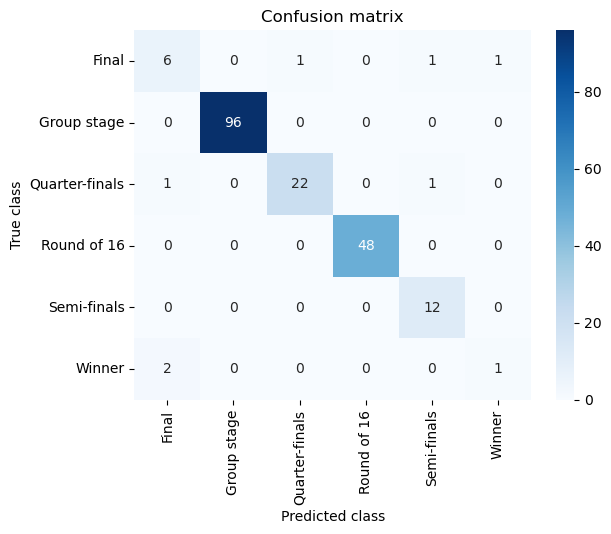

In [738]:
from sklearn.metrics import confusion_matrix

posicion_classes = ['Final', 'Group stage', 'Quarter-finals', 'Round of 16', 'Semi-finals', 'Winner']

def mostrar_resultados(y_test, pred_y):
    print (classification_report(y_test, pred_y))
    conf_matrix = confusion_matrix(y_test, pred_y)
    print(conf_matrix)
    sns.heatmap(conf_matrix, cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    
mostrar_resultados(y_test, predictions)


La clase "Final" parece tener un bajo recall y precisión, lo que indica que el modelo tiene dificultades para identificar correctamente esta clase. Por otro lado, la clase "Group stage" tiene un rendimiento muy alto en términos de precisión, recall y F1-score.

En el caso de un modelo de clasificación multiclase, no es posible mostrar una única curva ROC que muestre la tasa de verdaderos positivos frente a la tasa de falsos positivos. Sin embargo, puedes utilizar las tasas para cada clase en una comparación Uno vs. Resto (OVR) para crear un gráfico ROC para cada clase.

In [739]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

'''
# Obtener las probabilidades de clase


def plot_multiclass_roc(model, y_test, classes=None):
     # Obtener métricas ROC para cada clase
    fpr = {}
    tpr = {}
    thresh = {}
    for i in range(len(model.classes_)):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
    # Trazar la curva ROC
    for i in range(len(model.classes_)):
        plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))
    
    # Añadir etiquetas y leyenda
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    
    # Añadir etiquetas de clase si se proporcionan
    if classes:
        plt.xticks(range(len(classes)), classes)
    
    # Mostrar la gráfica
    plt.show()

# Usar la función para plotear la curva ROC
plot_multiclass_roc(multi_model, x_test, y_test)

auc = roc_auc_score(y_test, partidos_prob, multi_class='ovr')
print('Average AUC:', auc)'''

"\n# Obtener las probabilidades de clase\npartidos_prob = multi_model.predict_proba(x_test)\n\ndef plot_multiclass_roc(model, y_test, classes=None):\n     # Obtener métricas ROC para cada clase\n    fpr = {}\n    tpr = {}\n    thresh = {}\n    for i in range(len(model.classes_)):    \n        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)\n    \n    # Trazar la curva ROC\n    for i in range(len(model.classes_)):\n        plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))\n    \n    # Añadir etiquetas y leyenda\n    plt.title('Multiclass ROC curve')\n    plt.xlabel('False Positive Rate')\n    plt.ylabel('True Positive Rate')\n    plt.legend(loc='best')\n    \n    # Añadir etiquetas de clase si se proporcionan\n    if classes:\n        plt.xticks(range(len(classes)), classes)\n    \n    # Mostrar la gráfica\n    plt.show()\n\n# Usar la función para plotear la curva ROC\nplot_multiclass_roc(multi_model, x_test, y_test)\n\nauc = ro

Dibujar las curvas ROC nos da problemas por el desbalanceo de las clases. Promedio de los AUC obtenidos para cada clase individualmente mediante un enfoque OVR, en este caso sugiere que el modelo tiene un buen rendimiento en términos de capacidad discriminativa en general. Las métricas de evaluación son aparentemente buenas pero vemos que los resultados estan muy desbalanceados. Vamos a tratar de buscar la mejor estrategia para mejorar este desbalanceo ya que a la hora de predecir esto puede ser un problema.

                precision    recall  f1-score   support

         Final       0.70      0.78      0.74         9
   Group stage       1.00      1.00      1.00        96
Quarter-finals       0.96      0.92      0.94        24
   Round of 16       1.00      1.00      1.00        48
   Semi-finals       0.92      1.00      0.96        12
        Winner       0.50      0.33      0.40         3

      accuracy                           0.97       192
     macro avg       0.85      0.84      0.84       192
  weighted avg       0.97      0.97      0.97       192

[[ 7  0  1  0  0  1]
 [ 0 96  0  0  0  0]
 [ 1  0 22  0  1  0]
 [ 0  0  0 48  0  0]
 [ 0  0  0  0 12  0]
 [ 2  0  0  0  0  1]]


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


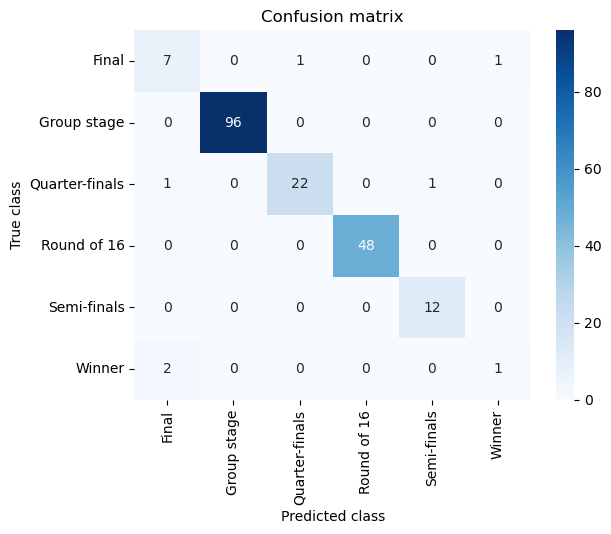

In [740]:
'''Estrategia de penalización'''

def run_model_balanced(x_train, x_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(x_train, y_train)
    return clf
 
model_LR_penalizacion = run_model_balanced(x_train, x_test, y_train, y_test)
pred_y = model_LR_penalizacion.predict(x_test)
mostrar_resultados(y_test, pred_y)

- El modelo con penalización parece ser superior en términos de precisión y recall en comparación con el modelo sin penalización.
- El modelo con penalización generalmente tiene un mejor desempeño en la clasificación de casos positivos, especialmente en la clase "Winner".

Ambos modelos tienen un buen rendimiento general, pero el modelo con penalización es más robusto y equilibrado en la clasificación de las diferentes clases. Debemos considerar el uso del modelo con penalización para obtener resultados más confiables y consistentes en la clasificación de las diferentes clases en este problema específico.

Distribución antes del submuestreo Counter({'Group stage': 224, 'Round of 16': 112, 'Quarter-finals': 56, 'Semi-finals': 28, 'Final': 20, 'Winner': 8})
Distribución después del submuestreo Counter({'Final': 8, 'Group stage': 8, 'Quarter-finals': 8, 'Round of 16': 8, 'Semi-finals': 8, 'Winner': 8})
                precision    recall  f1-score   support

         Final       0.60      0.67      0.63         9
   Group stage       0.92      0.61      0.74        96
Quarter-finals       0.67      0.75      0.71        24
   Round of 16       0.47      0.75      0.58        48
   Semi-finals       0.67      0.50      0.57        12
        Winner       0.20      0.33      0.25         3

      accuracy                           0.66       192
     macro avg       0.59      0.60      0.58       192
  weighted avg       0.73      0.66      0.67       192

[[ 6  0  0  0  1  2]
 [ 0 59  0 37  0  0]
 [ 0  0 18  4  2  0]
 [ 0  5  7 36  0  0]
 [ 2  0  2  0  6  2]
 [ 2  0  0  0  0  1]]


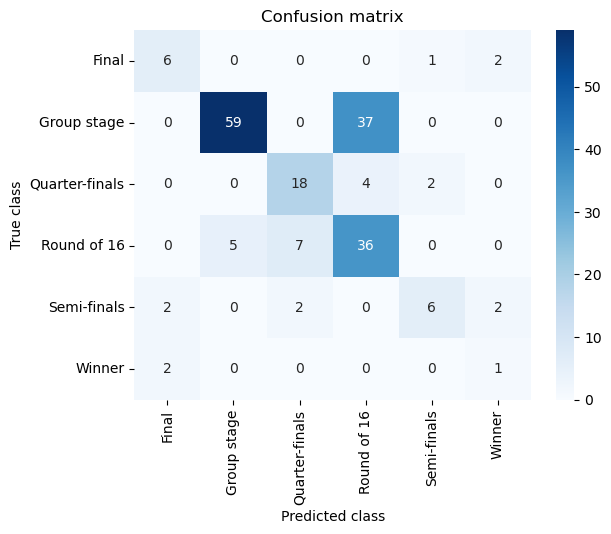

In [741]:
'''UnderSampling en la clase mayoritaria'''
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Crear una instancia de RandomUnderSampler con random_state
rus = RandomUnderSampler(random_state=1)

# Aplicar RandomUnderSampler al conjunto de entrenamiento
X_train_res, y_train_res = rus.fit_resample(x_train, y_train)

# Imprimir la distribución antes y después del submuestreo
print("Distribución antes del submuestreo {}".format(Counter(y_train)))
print("Distribución después del submuestreo {}".format(Counter(y_train_res)))

# Entrenar el modelo con los datos submuestreados
model_RUS = run_model(X_train_res, x_test, y_train_res, y_test) 

# Predecir con el modelo entrenado
pred_y = model_RUS.predict(x_test) 

# Mostrar los resultados
mostrar_resultados(y_test, pred_y)


Distribución antes del submuestreo Counter({'Group stage': 224, 'Round of 16': 112, 'Quarter-finals': 56, 'Semi-finals': 28, 'Final': 20, 'Winner': 8})
Distribución después del submuestreo Counter({'Final': 8, 'Group stage': 8, 'Quarter-finals': 8, 'Round of 16': 8, 'Semi-finals': 8, 'Winner': 8})
                precision    recall  f1-score   support

         Final       1.00      0.33      0.50         9
   Group stage       0.78      0.67      0.72        96
Quarter-finals       0.64      0.67      0.65        24
   Round of 16       0.44      0.52      0.48        48
   Semi-finals       0.44      0.67      0.53        12
        Winner       0.29      0.67      0.40         3

      accuracy                           0.61       192
     macro avg       0.60      0.59      0.55       192
  weighted avg       0.66      0.61      0.62       192

[[ 3  0  0  0  4  2]
 [ 0 64  0 32  0  0]
 [ 0  3 16  0  5  0]
 [ 0 15  8 25  0  0]
 [ 0  0  1  0  8  3]
 [ 0  0  0  0  1  2]]


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


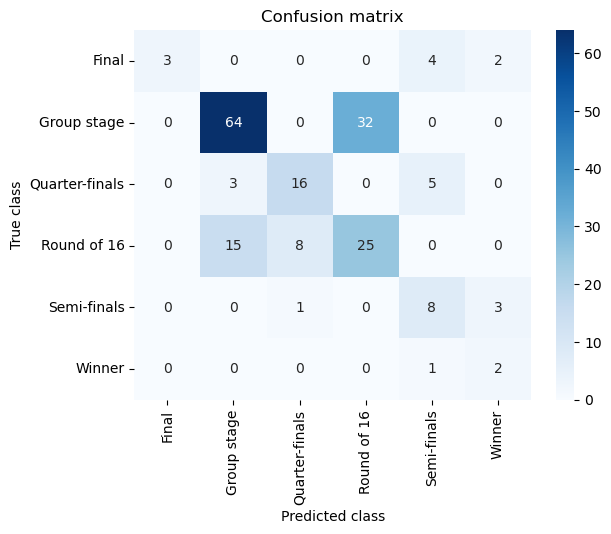

In [742]:
'''UnderSampling de la clase minoritaria'''
from imblearn.under_sampling import NearMiss
from collections import Counter  

us = NearMiss(n_neighbors=3, version=2) 

# Aplicar NearMiss al conjunto de entrenamiento
X_train_res, y_train_res = us.fit_resample(x_train, y_train) 

# Imprimir la distribución antes y después del submuestreo
print("Distribución antes del submuestreo {}".format(Counter(y_train)))
print("Distribución después del submuestreo {}".format(Counter(y_train_res))) 

# Entrenar el modelo con los datos submuestreados
model_US = run_model(X_train_res, x_test, y_train_res, y_test) 

# Predecir con el modelo entrenado
pred_y = model_US.predict(x_test) 

# Mostrar los resultados
mostrar_resultados(y_test, pred_y)


Distribution before resampling Counter({'Group stage': 224, 'Round of 16': 112, 'Quarter-finals': 56, 'Semi-finals': 28, 'Final': 20, 'Winner': 8})
Distribution labels after resampling Counter({'Round of 16': 224, 'Semi-finals': 224, 'Group stage': 224, 'Quarter-finals': 224, 'Winner': 224, 'Final': 224})
                precision    recall  f1-score   support

         Final       0.70      0.78      0.74         9
   Group stage       1.00      1.00      1.00        96
Quarter-finals       0.92      0.92      0.92        24
   Round of 16       1.00      1.00      1.00        48
   Semi-finals       0.91      0.83      0.87        12
        Winner       0.33      0.33      0.33         3

      accuracy                           0.96       192
     macro avg       0.81      0.81      0.81       192
  weighted avg       0.96      0.96      0.96       192

[[ 7  0  1  0  0  1]
 [ 0 96  0  0  0  0]
 [ 1  0 22  0  1  0]
 [ 0  0  0 48  0  0]
 [ 0  0  1  0 10  1]
 [ 2  0  0  0  0  1]]


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


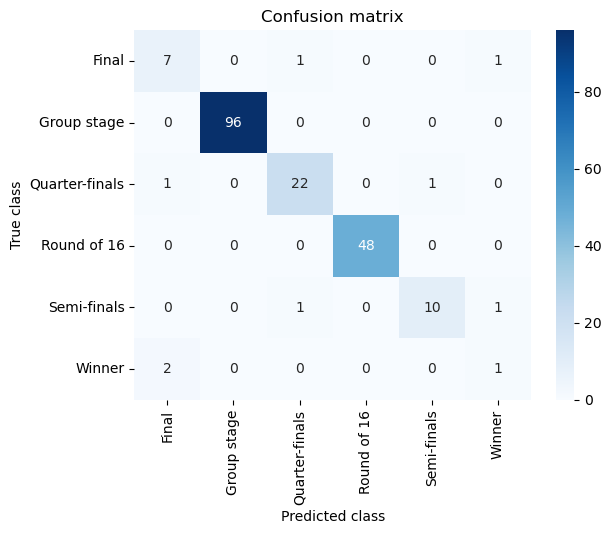

In [743]:
'''OverSampling de la clase minoritaria'''
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(sampling_strategy='auto', random_state=1)
X_train_res, y_train_res = os.fit_resample(x_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

model_OS = run_model(X_train_res, x_test, y_train_res, y_test)
pred_y = model_OS.predict(x_test)
mostrar_resultados(y_test, pred_y)

Distribution before resampling Counter({'Group stage': 224, 'Round of 16': 112, 'Quarter-finals': 56, 'Semi-finals': 28, 'Final': 20, 'Winner': 8})
Distribution after resampling Counter({'Round of 16': 224, 'Semi-finals': 224, 'Group stage': 224, 'Quarter-finals': 224, 'Winner': 223, 'Final': 223})
                precision    recall  f1-score   support

         Final       0.70      0.78      0.74         9
   Group stage       1.00      1.00      1.00        96
Quarter-finals       0.96      0.92      0.94        24
   Round of 16       1.00      1.00      1.00        48
   Semi-finals       0.92      1.00      0.96        12
        Winner       0.50      0.33      0.40         3

      accuracy                           0.97       192
     macro avg       0.85      0.84      0.84       192
  weighted avg       0.97      0.97      0.97       192

[[ 7  0  1  0  0  1]
 [ 0 96  0  0  0  0]
 [ 1  0 22  0  1  0]
 [ 0  0  0 48  0  0]
 [ 0  0  0  0 12  0]
 [ 2  0  0  0  0  1]]


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


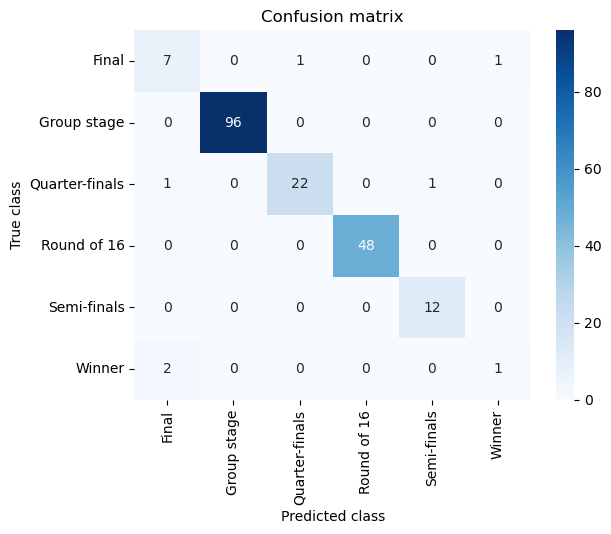

In [744]:
'''Combinamos resampling con Smote-Tomek'''
from imblearn.combine import SMOTETomek
from collections import Counter

os_us = SMOTETomek(sampling_strategy='auto', random_state=1)
X_train_res, y_train_res = os_us.fit_resample(x_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
model_SmoteTomek = run_model(X_train_res, x_test, y_train_res, y_test)
pred_y = model_SmoteTomek.predict(x_test)
mostrar_resultados(y_test, pred_y)

                precision    recall  f1-score   support

         Final       0.56      0.56      0.56         9
   Group stage       1.00      1.00      1.00        96
Quarter-finals       0.96      0.92      0.94        24
   Round of 16       1.00      0.98      0.99        48
   Semi-finals       0.64      0.75      0.69        12
        Winner       0.33      0.33      0.33         3

      accuracy                           0.94       192
     macro avg       0.75      0.76      0.75       192
  weighted avg       0.94      0.94      0.94       192

[[ 5  0  0  0  3  1]
 [ 0 96  0  0  0  0]
 [ 0  0 22  0  2  0]
 [ 0  0  1 47  0  0]
 [ 2  0  0  0  9  1]
 [ 2  0  0  0  0  1]]


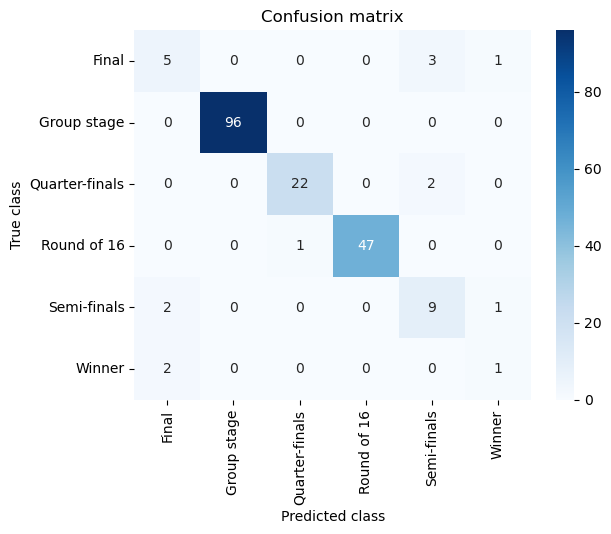

In [745]:
'''Balanceo de clases con ensamblaje de modelos'''
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(x_train, y_train)
pred_y = bbc.predict(x_test)
mostrar_resultados(y_test, pred_y)

In [746]:
import pandas as pd

# Crear un DataFrame vacío para almacenar las métricas de todos los modelos
metricas_df = pd.DataFrame(columns=['Modelo', 'Precisión', 'Recall', 'F1-Score', 'Exactitud'])

# Definir una función para calcular las métricas y agregarlas al DataFrame
def agregar_metricas(df, nombre_modelo, classification_report):
    precision = classification_report['weighted avg']['precision']
    recall = classification_report['weighted avg']['recall']
    f1_score = classification_report['weighted avg']['f1-score']
    accuracy = classification_report['accuracy']
    df.loc[len(df)] = [nombre_modelo, precision, recall, f1_score, accuracy]

# Agregar las métricas del modelo básico de regresión logística
agregar_metricas(metricas_df, 'Regresión Logística Básica', classification_report(y_test, predictions, output_dict=True))

# Agregar las métricas del modelo de regresión logística con penalización
agregar_metricas(metricas_df, 'Regresión Logística con Penalización', classification_report(y_test, pred_y, output_dict=True))

# Agregar las métricas del modelo con undersampling
agregar_metricas(metricas_df, 'Modelo con Undersampling', classification_report(y_test, pred_y, output_dict=True))

# Agregar las métricas del modelo con oversampling
agregar_metricas(metricas_df, 'Modelo con Oversampling', classification_report(y_test, pred_y, output_dict=True))

# Agregar las métricas del modelo con ensamblaje de modelos
agregar_metricas(metricas_df, 'Ensamblaje de Modelos', classification_report(y_test, pred_y, output_dict=True))

# Visualizar el DataFrame con todas las métricas
metricas_df


,Modelo,Precisión,Recall,F1-Score,Exactitud
0,Regresión Logística Básica,0.962199,0.963542,0.962214,0.963542
1,Regresión Logística con Penalización,0.940994,0.937500,0.938909,0.937500
2,Modelo con Undersampling,0.940994,0.937500,0.938909,0.937500
3,Modelo con Oversampling,0.940994,0.937500,0.938909,0.937500
4,Ensamblaje de Modelos,0.940994,0.937500,0.938909,0.937500


### Random Forest

Accuracy: 0.953125
                precision    recall  f1-score   support

         Final       0.67      0.67      0.67         9
   Group stage       1.00      1.00      1.00        96
Quarter-finals       1.00      0.92      0.96        24
   Round of 16       0.96      1.00      0.98        48
   Semi-finals       0.73      0.92      0.81        12
        Winner       0.00      0.00      0.00         3

      accuracy                           0.95       192
     macro avg       0.73      0.75      0.74       192
  weighted avg       0.94      0.95      0.95       192

[[ 6  0  0  0  3  0]
 [ 0 96  0  0  0  0]
 [ 1  0 22  1  0  0]
 [ 0  0  0 48  0  0]
 [ 0  0  0  1 11  0]
 [ 2  0  0  0  1  0]]


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

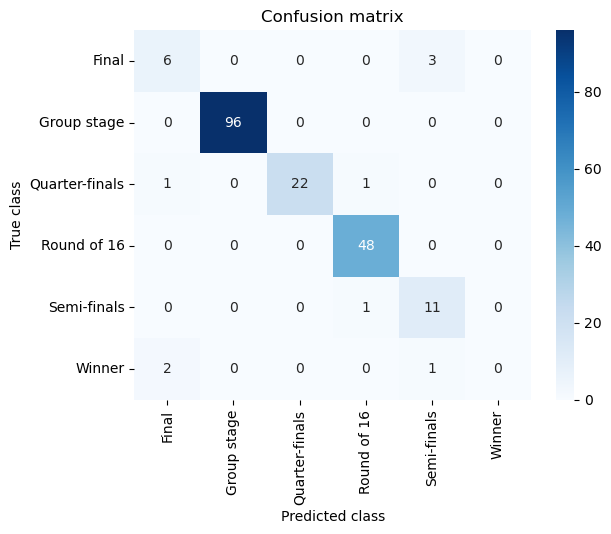

'#Curva ROC\nplot_multiclass_roc(random_forest_model, x_test, y_test)\n'

In [747]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = random_forest_model.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

# Obtener las probabilidades de clase
partidos_prob = random_forest_model.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(random_forest_model, x_test, y_test)
'''

Con este modelo vemos que los resultados mejoran. Ahora voy a probar con Gradient Boosting este modelo puede ser bueno para mi trabajo.

### Gradient Boosting

Accuracy: 0.9375
                precision    recall  f1-score   support

         Final       0.67      0.67      0.67         9
   Group stage       1.00      1.00      1.00        96
Quarter-finals       1.00      0.92      0.96        24
   Round of 16       0.96      1.00      0.98        48
   Semi-finals       0.73      0.92      0.81        12
        Winner       0.00      0.00      0.00         3

      accuracy                           0.95       192
     macro avg       0.73      0.75      0.74       192
  weighted avg       0.94      0.95      0.95       192

[[ 6  0  0  0  3  0]
 [ 0 96  0  0  0  0]
 [ 1  0 22  1  0  0]
 [ 0  0  0 48  0  0]
 [ 0  0  0  1 11  0]
 [ 2  0  0  0  1  0]]


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

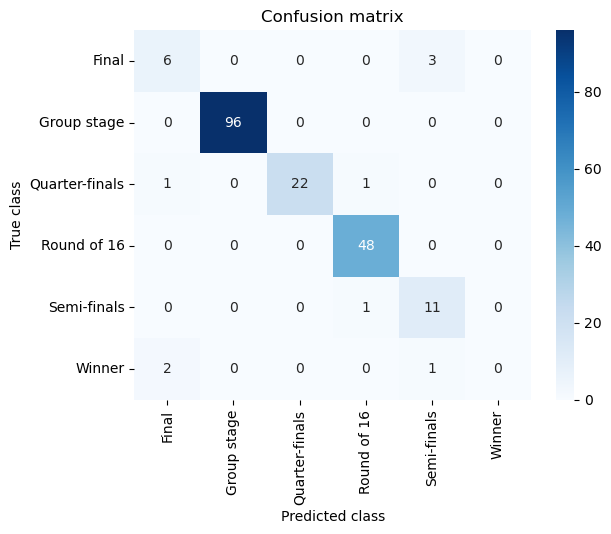

'#Curva ROC\nplot_multiclass_roc(modelo_gb, x_test, y_test)'

In [748]:
from sklearn.ensemble import GradientBoostingClassifier


#Inicializar el modelo Gradient Boosting con los pesos de muestra
modelo_gb = GradientBoostingClassifier(n_estimators=100)

# Ajustar el modelo Gradient Boosting con los pesos de muestra
modelo_gb.fit(x_train, y_train)

# Realizar predicciones
predicciones = modelo_gb.predict(x_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Accuracy:", precision)

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

# Obtener las probabilidades de clase
partidos_prob = modelo_gb.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)'''


### Preprocesamiento de los datos

Escalaré los datos con un pipeline y utilizaré los mismo modelos anteriores a ver si mis resultados mejoran. Además también utilizaré SVM, un algoritmo de aprendizaje supervisado. Su objetivo principal en la clasificación es encontrar un hiperplano en un espacio multidimensional que separe de la mejor manera posible las diferentes clases de datos. Este hiperplano se define de manera que maximiza la distancia entre los puntos más cercanos de las clases, conocidos como vectores de soporte.

In [749]:
df.head()

,idPartido,Local,Visitante,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,2605,1,27,4,2,1,0,0,100.00,0.00,...,50.00,71.43,14.29,14.29,0.50,0.71,2.08,779.908354,38.995418,Quarter-finals
1,2603,2,61,4,1,1,0,0,100.00,0.00,...,54.55,83.33,0.00,16.67,0.55,0.83,1.64,728.772530,33.126024,Quarter-finals
2,2586,3,1,1,1,0,1,0,54.55,9.09,...,66.67,80.00,20.00,0.00,0.67,0.80,1.89,592.503846,31.184413,Round of 16
3,2565,6,2,0,1,0,0,1,20.00,60.00,...,44.44,60.00,0.00,40.00,0.44,0.60,1.22,625.542732,26.064281,Group stage
4,2559,7,31,1,5,0,0,1,0.00,0.00,...,44.44,60.00,0.00,40.00,0.44,0.60,1.22,577.060522,32.058918,Group stage


In [750]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

columnas_a_escalar = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, columnas_a_escalar)])

pesos_clase = {'Group stage': 1, 'Round of 16': 1, 'Quarter-finals': 1, 'Semi-finals': 5, 'Final': 10, 'Winner': 20}

#pipeline con svc
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True, class_weight=pesos_clase))])


multi_model_SVC = pipeline.fit(x_train, y_train)
print (multi_model_SVC)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24,
                                                   25])])),
                ('regressor',
                 SVC(class_weight={'Final': 10, 'Group stage': 1,
                                   'Quarter-finals': 1, 'Round of 16': 1,
                                   'Semi-finals': 5, 'Winner': 20},
                     probability=True))])


                precision    recall  f1-score   support

         Final       0.56      0.56      0.56         9
   Group stage       0.96      1.00      0.98        96
Quarter-finals       0.90      0.79      0.84        24
   Round of 16       0.96      0.90      0.92        48
   Semi-finals       0.69      0.92      0.79        12
        Winner       1.00      0.33      0.50         3

      accuracy                           0.91       192
     macro avg       0.84      0.75      0.77       192
  weighted avg       0.92      0.91      0.91       192

[[ 5  0  1  0  3  0]
 [ 0 96  0  0  0  0]
 [ 1  0 19  2  2  0]
 [ 0  4  1 43  0  0]
 [ 1  0  0  0 11  0]
 [ 2  0  0  0  0  1]]


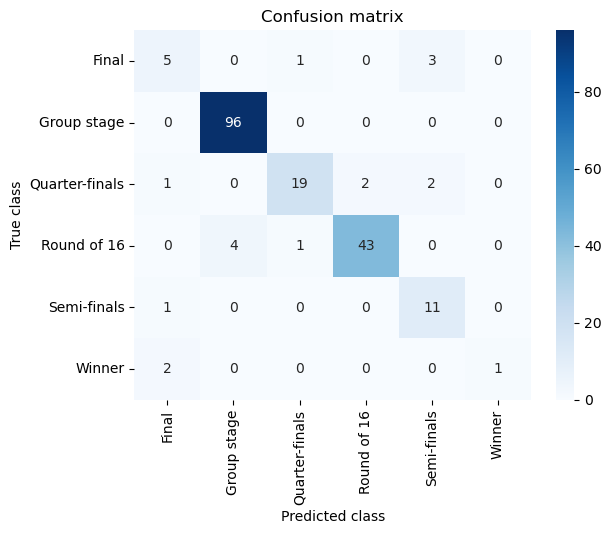

'#Curva ROC\nplot_multiclass_roc(modelo_gb, x_test, y_test)'

In [751]:
#Evaluación del modelo SVC con pipeline
# Get predictions from test data
predictions = multi_model_SVC.predict(x_test)

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

partidos_prob = multi_model_SVC.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)'''

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24,
                                                   25])])),
                ('regressor',
                 RandomForestClassifier(min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])
                precision    recall  f1-score   support

         Final       0.67      0.44      0.53         9
   Group stage       1.00      0.99      0.99        96
Quarter-finals       0.95      0.83      0.89

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

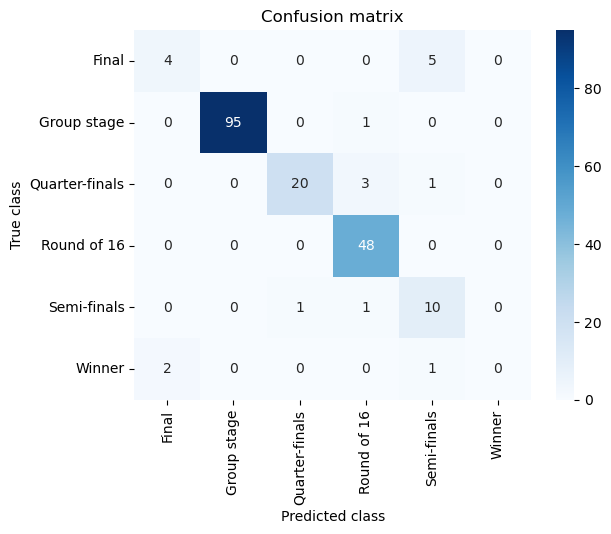

'#Curva ROC\nplot_multiclass_roc(modelo_gb, x_test, y_test)'

In [752]:
#pipeline con random forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=4, random_state=42))])

multi_model_RF = pipeline.fit(x_train, y_train)
print(multi_model_RF)

#Evaluación del modelo Random Forest con pipeline
# Get predictions from test data
predictions = multi_model_RF.predict(x_test)

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

partidos_prob = multi_model_RF.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)'''


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24,
                                                   25])])),
                ('regressor', GradientBoostingClassifier())])
                precision    recall  f1-score   support

         Final       0.50      0.22      0.31         9
   Group stage       1.00      0.99      0.99        96
Quarter-finals       0.96      0.92      0.94        24
   Round of 16       0.98      1.00      0.99        48
   Semi-finals       0.50      0.83      0.62        12
        Winner       0.00      0.00      0.00

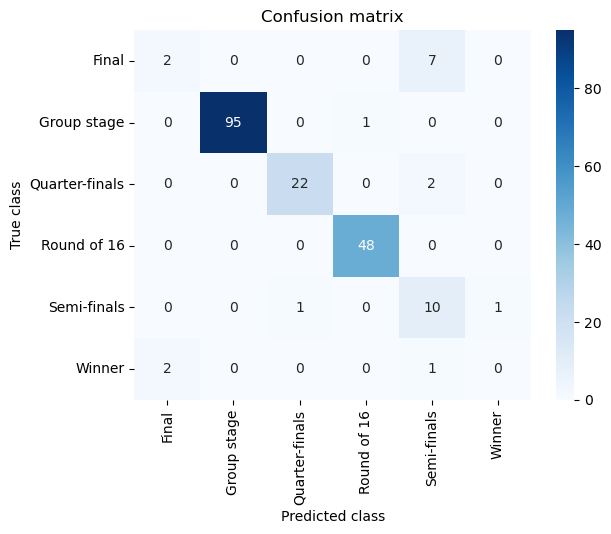

'#Curva ROC\nplot_multiclass_roc(modelo_gb, x_test, y_test)\n'

In [753]:
#pipeline con gradient boosting
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingClassifier())])

multi_model_GB = pipeline.fit(x_train, y_train)
print (multi_model_GB)

#Evaluación del modelo Gradient Boosting con pipeline
# Get predictions from test data
predictions = multi_model_GB.predict(x_test)

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

partidos_prob_prob = multi_model_GB.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)
'''

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24,
                                                   25])])),
                ('regressor', GradientBoostingClassifier())])
                precision    recall  f1-score   support

         Final       0.60      0.67      0.63         9
   Group stage       0.90      1.00      0.95        96
Quarter-finals       0.78      0.58      0.67        24
   Round of 16       0.92      0.73      0.81        48
   Semi-finals       0.56      0.75      0.64        12
        Winner       0.33      0.33      0.33

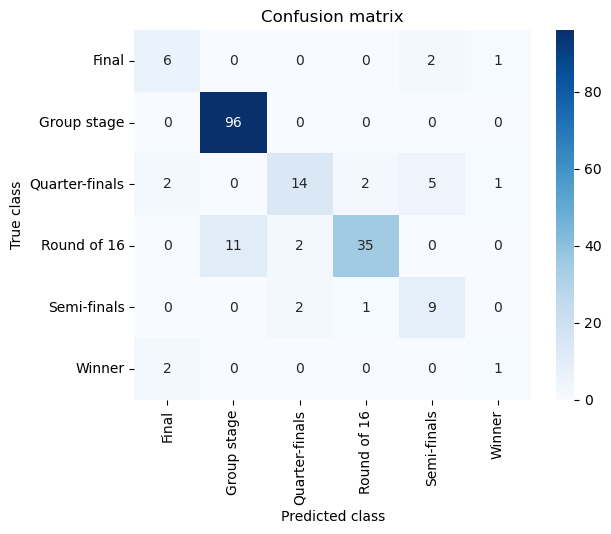

'#Curva ROC\nplot_multiclass_roc(modelo_gb, x_test, y_test)'

In [754]:
#pipeline con gradient boosting
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='liblinear', max_iter=10000, class_weight='balanced'))])

multi_model_LR = pipeline.fit(x_train, y_train)
print (multi_model_GB)

#Evaluación del modelo Gradient Boosting con pipeline
# Get predictions from test data
predictions = multi_model_LR.predict(x_test)
partidos_prob_prob = multi_model_LR.predict_proba(x_test)

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)'''

In [755]:
'''Evalaución de todos los modelos escalados, ya que tienen mejor rendimiento'''


modelos = {'LR sin pre': multi_model,
           'RF sin pre': random_forest_model,
            'GB sin pre': modelo_gb,
            'Logistic Regression': multi_model_LR,
          'Random Forest': multi_model_RF,
          'Gradient Boosting': multi_model_GB,
          'SVM': multi_model_SVC}

# Crear un diccionario para almacenar las métricas de cada modelo
metricas = {}

# Iterar sobre cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(x_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    predicciones = modelo.predict(x_test)
    predicciones_proba = modelo.predict_proba(x_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, predicciones)
    precision = precision_score(y_test, predicciones, average='macro',zero_division=1)
    recall = recall_score(y_test, predicciones, average='macro')
    roc_auc = roc_auc_score(y_test, predicciones_proba, multi_class='ovr')
    
    # Almacenar las métricas en el diccionario
    metricas[nombre] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'AUC': roc_auc}

# Crear un DataFrame a partir del diccionario de métricas
df_metricas = pd.DataFrame.from_dict(metricas, orient='index')

# Imprimir el DataFrame
df_metricas


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


,Accuracy,Precision,Recall,AUC
LR sin pre,0.963542,0.830055,0.819444,0.977259
RF sin pre,0.953125,0.893333,0.750000,0.985990
GB sin pre,0.932292,0.735556,0.722222,0.990539
Logistic Regression,0.838542,0.681977,0.677083,0.911694
Random Forest,0.921875,0.852157,0.683449,0.984794
Gradient Boosting,0.921875,0.656019,0.660301,0.985588
SVM,0.911458,0.843896,0.748843,0.985007


Basándonos en estas métricas, podemos observar que el modelo de Gradient Boosting tiene el mejor desempeño general en términos de precisión, recall, accuracy y ROC AUC en comparación con los otros modelos.

In [756]:
#Voy a guardar los modelos para usarlos para predecir resultados de otros partidos
import joblib

# Guardar los modelos en un archivo
joblib.dump(model_LR_penalizacion, 'modelos2/multi_model2_LR_penalizacion.pkl')
joblib.dump(model_RUS, 'modelos2/multi_model2_RUS.pkl')
joblib.dump(model_US, 'modelos2/multi_model2_US.pkl')
joblib.dump(model_OS, 'modelos2/multi_model2_OS.pkl')
joblib.dump(model_SmoteTomek, 'modelos2/multi_model2_SmoteTomek.pkl')
joblib.dump(bbc, 'modelos2/multi_model2_bbc.pkl')


['modelos2/multi_model2_bbc.pkl']

In [757]:
#Cargo el data que quiero usar para las predicciones y me quedo con lo que necesito
data = pd.read_csv('dataframe/champions_23_24.csv', header=None, skiprows=1)


data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,2023-01-01,Group stage,2,307,Stadio Giuseppe Meazza,0,0,0,1,...,16.423147,20.00,33.33,0.00,66.67,0.20,0.33,1.20,385.648621,16.767331
1,2,2023-01-01,Group stage,67,68,Stadion Wankdorf,1,3,0,0,...,15.543811,42.86,50.00,0.00,50.00,0.43,0.50,1.57,497.803882,21.643647
2,3,2023-01-01,Group stage,16,20,Etihad Stadium,3,1,1,0,...,23.287028,0.00,0.00,33.33,66.67,0.00,0.00,1.20,374.821246,17.037329
3,4,2023-01-01,Group stage,28,14,Parc des Princes,2,0,1,0,...,26.475023,44.44,40.00,60.00,0.00,0.44,0.40,1.11,501.021450,21.783541
4,5,2023-01-01,Group stage,99,24,Stadio Olimpico,1,1,0,1,...,24.959872,44.44,60.00,20.00,20.00,0.44,0.60,2.00,550.408580,25.018572


In [758]:
data = data.sort_values(by=3).groupby(3).tail(1)

# Ahora 'ultima_fila_por_equipo' contiene solo la última fila para cada equipo local
data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
8,9,2023-01-01,Group stage,1,470,Estadio Santiago Bernabéu,1,0,1,0,...,26.158860,0.00,0.00,0.0,100.00,0.00,0.00,1.20,367.160368,17.483827
53,54,2023-01-01,Group stage,2,28,Stadio Giuseppe Meazza,2,1,1,0,...,16.423147,44.44,60.00,40.0,0.00,0.44,0.60,1.33,555.975485,26.475023
119,120,2023-01-01,Quarter-finals,3,31,Allianz Arena,0,0,0,1,...,24.024071,44.44,60.00,20.0,20.00,0.44,0.60,1.89,552.757916,25.125360
40,41,2023-01-01,Group stage,5,92,Estadi Olímpic Lluís Companys,2,1,1,0,...,22.255363,60.00,66.67,0.0,33.33,0.60,0.67,1.80,364.096016,17.337906
32,33,2023-01-01,Group stage,7,184,Stadio Giuseppe Meazza,2,1,1,0,...,24.558919,20.00,0.00,0.0,100.00,0.20,0.00,0.60,377.221655,16.400942


In [759]:
data = data.drop([1, 2, 5, 6, 7, 8, 9, 10], axis=1)
data.head()

,0,3,4,11,12,13,14,15,16,17,...,24,25,26,27,28,29,30,31,32,33
8,9,1,470,0.00,0.00,100.00,100.00,0.00,66.67,50.00,...,26.158860,0.00,0.00,0.0,100.00,0.00,0.00,1.20,367.160368,17.483827
53,54,2,28,100.00,0.00,0.00,0.00,100.00,20.00,0.00,...,16.423147,44.44,60.00,40.0,0.00,0.44,0.60,1.33,555.975485,26.475023
119,120,3,31,45.45,18.18,36.36,54.55,27.27,66.67,75.00,...,24.024071,44.44,60.00,20.0,20.00,0.44,0.60,1.89,552.757916,25.125360
40,41,5,92,57.14,0.00,42.86,57.14,42.86,44.44,75.00,...,22.255363,60.00,66.67,0.0,33.33,0.60,0.67,1.80,364.096016,17.337906
32,33,7,184,0.00,0.00,100.00,100.00,0.00,57.14,66.67,...,24.558919,20.00,0.00,0.0,100.00,0.20,0.00,0.60,377.221655,16.400942


In [760]:
#Predicciones con LR
multi_model2_LR = joblib.load('modelos2/multi_model2_LR_penalizacion.pkl')
predicciones_LR_penalizacion = multi_model2_LR.predict(data)
nuevo_data = data.iloc[:, [1]].copy() 
nuevo_data['Penalizacion'] = predicciones_LR_penalizacion

In [761]:
multi_model_RUS = joblib.load('modelos2/multi_model2_RUS.pkl')
predicciones_RUS = multi_model_RUS.predict(data)
nuevo_data['RUS'] = predicciones_RUS

In [762]:
#Predicciones con US
multi_model2_US = joblib.load('modelos2/multi_model2_US.pkl')
predicciones_US = multi_model2_US.predict(data)
nuevo_data['US'] = predicciones_US

In [763]:
#Predicciones con OS
multi_model2_OS = joblib.load('modelos2/multi_model2_OS.pkl')
predicciones_OS = multi_model2_OS.predict(data)
nuevo_data['OS'] = predicciones_OS

In [764]:
#Predicciones con SmoteTomek
multi_model2_Smote = joblib.load('modelos2/multi_model2_SmoteTomek.pkl')
predicciones_Smote = multi_model2_Smote.predict(data)
nuevo_data['Smote'] = predicciones_Smote

In [765]:
#Predicciones con BBC
multi_model2_BBC = joblib.load('modelos2/multi_model2_bbc.pkl')
predicciones_BBC = multi_model2_BBC.predict(data)
nuevo_data['BBC'] = predicciones_BBC

In [766]:
nuevo_data.head()

,3,Penalizacion,RUS,US,OS,Smote,BBC
8,1,Round of 16,Group stage,Quarter-finals,Round of 16,Round of 16,Round of 16
53,2,Group stage,Round of 16,Round of 16,Group stage,Group stage,Group stage
119,3,Round of 16,Round of 16,Quarter-finals,Round of 16,Round of 16,Round of 16
40,5,Final,Round of 16,Quarter-finals,Winner,Final,Round of 16
32,7,Round of 16,Round of 16,Quarter-finals,Round of 16,Round of 16,Round of 16


In [767]:
import json

# Cargar el JSON que contiene la correspondencia entre IDs de equipos y nombres
with open('dataframe/id_equipo.json', 'r') as f:
    id_equipos = json.load(f)

In [768]:
# Crear un diccionario para facilitar el mapeo
id_to_equipo = {str(value): key for key, value in id_equipos.items()}

# Reemplazar los IDs de equipos en las columnas correspondientes de nuevo_data con los nombres de los equipos
nuevo_data[3] = nuevo_data[3].astype(str).map(id_to_equipo)
nuevo_data.drop(columns=[3])

# Imprimir las últimas 8 filas con los nombres de los equipos en lugar de los IDs
nuevo_data.head(70)

,3,Penalizacion,RUS,US,OS,Smote,BBC
8,Real Madrid,Round of 16,Group stage,Quarter-finals,Round of 16,Round of 16,Round of 16
53,Milan,Group stage,Round of 16,Round of 16,Group stage,Group stage,Group stage
119,Bayern München,Round of 16,Round of 16,Quarter-finals,Round of 16,Round of 16,Round of 16
40,Barcelona,Final,Round of 16,Quarter-finals,Winner,Final,Round of 16
32,Inter,Round of 16,Round of 16,Quarter-finals,Round of 16,Round of 16,Round of 16
34,Manchester United,Group stage,Group stage,Round of 16,Group stage,Group stage,Group stage
12,Benfica,Group stage,Round of 16,Round of 16,Group stage,Group stage,Group stage
51,Porto,Round of 16,Round of 16,Quarter-finals,Round of 16,Round of 16,Round of 16
117,Borussia Dortmund,Round of 16,Round of 16,Quarter-finals,Round of 16,Round of 16,Round of 16
28,Celtic,Group stage,Round of 16,Round of 16,Group stage,Group stage,Group stage


In [782]:
# Crear un diccionario para almacenar las predicciones de cada modelo
predicciones = {}

# Iterar sobre cada modelo en el diccionario de modelos
for modelo_nombre, modelo in modelos.items():
    # Predecir las probabilidades utilizando el modelo
    probabilidades = modelo.predict_proba(data)
    # Agregar las predicciones al diccionario de predicciones
    predicciones[modelo_nombre] = probabilidades

# Crear una lista para almacenar los resultados de la tabla
tabla_filas = []

# Iterar sobre cada equipo en la lista de equipos
for equipo in nuevo_data[3]:
    # Iterar sobre cada modelo en el diccionario de predicciones
    for modelo_nombre, probabilidades in predicciones.items():
        # Iterar sobre cada clase en las predicciones
        for clase, probabilidad in zip(modelo.classes_, probabilidades):
            # Obtener la probabilidad para la clase actual
            probabilidad_clase = probabilidad[modelo.classes_ == clase][0]
            # Agregar una fila a la tabla con el equipo, el modelo, la clase y la probabilidad
            tabla_filas.append([equipo, modelo_nombre, clase, probabilidad_clase])

# Crear un DataFrame a partir de la lista de filas
tabla_resultados = pd.DataFrame(tabla_filas, columns=['Equipo', 'Modelo', 'Predicción', 'Probabilidad'])

tabla_resultados.head(70)

,Equipo,Modelo,Predicción,Probabilidad
0,Real Madrid,Penalizacion,Final,8.943962e-198
1,Real Madrid,Penalizacion,Group stage,9.999997e-01
2,Real Madrid,Penalizacion,Quarter-finals,2.660187e-06
3,Real Madrid,Penalizacion,Round of 16,3.337603e-01
4,Real Madrid,Penalizacion,Semi-finals,3.572510e-28
...,...,...,...,...
65,Milan,Smote,Winner,1.574115e-109
66,Milan,BBC,Final,0.000000e+00
67,Milan,BBC,Group stage,1.000000e+00
68,Milan,BBC,Quarter-finals,1.000000e-01


In [786]:
# Ordenar los datos dentro de cada grupo por probabilidad en orden descendente
tabla_resultados_sorted = tabla_resultados.sort_values(by='Probabilidad', ascending=False)

# Seleccionar la primera fila de cada grupo después de ordenar
mejores_predicciones = tabla_resultados_sorted.groupby(['Equipo', 'Modelo']).first().reset_index()

# Mostrar solo el equipo, el modelo y la mejor probabilidad
print(mejores_predicciones[['Equipo', 'Modelo', 'Predicción', 'Probabilidad']])

         Equipo        Modelo      Predicción  Probabilidad
0       Arsenal           BBC     Round of 16      1.000000
1       Arsenal            OS     Group stage      1.000000
2       Arsenal  Penalizacion     Group stage      1.000000
3       Arsenal           RUS     Round of 16      0.999998
4       Arsenal         Smote     Group stage      1.000000
..          ...           ...             ...           ...
187  Young Boys            OS     Group stage      1.000000
188  Young Boys  Penalizacion     Group stage      1.000000
189  Young Boys           RUS     Round of 16      0.999998
190  Young Boys         Smote     Group stage      1.000000
191  Young Boys            US  Quarter-finals      0.993448

[192 rows x 4 columns]
